In [1]:
import pandas as pd 
interactions_df = pd.read_csv('interactions.csv')
metadata_df = pd.read_csv('metadata.csv')
interactions_df.head()


,student_id,course_id,course_name,enrollment_status,rating
0,s1,c4,Corporate Governance and Ethics,enrolled,NaN
1,s1,c1,Business Communication,completed,1.0
2,s2,c1,Business Communication,enrolled,NaN
3,s3,c1,Business Communication,completed,3.0
4,s4,c3,Organizational Behavior,enrolled,NaN


In [2]:
interactions_df.to_csv("C:/Users/mwende/Documents/flask_api/interactions.csv", index=False)

In [3]:
metadata_df.head()

,course_id,course_name,description
0,c1,Business Communication,This course explores business strategy formula...
1,c2,Strategic management,This course explores business strategy formula...
2,c3,Organizational Behavior,"This course examines workplace dynamics, focus..."
3,c4,Corporate Governance and Ethics,This course delves into ethical decision-makin...


In [4]:
print(interactions_df.info())
print(metadata_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_id         1513 non-null   object 
 1   course_id          1513 non-null   object 
 2   course_name        1513 non-null   object 
 3   enrollment_status  1513 non-null   object 
 4   rating             762 non-null    float64
dtypes: float64(1), object(4)
memory usage: 59.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   course_id    4 non-null      object
 1   course_name  4 non-null      object
 2   description  4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes
None


In [5]:
interactions_df = interactions_df.dropna(subset=['rating'])
print(interactions_df.duplicated().sum())
print(interactions_df.info())
print(interactions_df.head())

0
<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 1 to 1512
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_id         762 non-null    object 
 1   course_id          762 non-null    object 
 2   course_name        762 non-null    object 
 3   enrollment_status  762 non-null    object 
 4   rating             762 non-null    float64
dtypes: float64(1), object(4)
memory usage: 35.7+ KB
None
   student_id course_id                      course_name enrollment_status  \
1          s1        c1           Business Communication         completed   
3          s3        c1           Business Communication         completed   
5          s4        c4  Corporate Governance and Ethics         completed   
9          s7        c1           Business Communication         completed   
12         s9        c1           Business Communication         completed   

    rating  
1      1.0  
3      3.

In [6]:
print(interactions_df['rating'].isna().sum()) 

0


In [7]:
print(interactions_df[['student_id', 'course_id', 'rating']].head(10))

   student_id course_id  rating
1          s1        c1     1.0
3          s3        c1     3.0
5          s4        c4     2.0
9          s7        c1     2.0
12         s9        c1     2.0
13         s9        c4     3.0
14        s10        c1     1.0
15        s11        c2     5.0
16        s11        c3     3.0
17        s12        c3     4.0


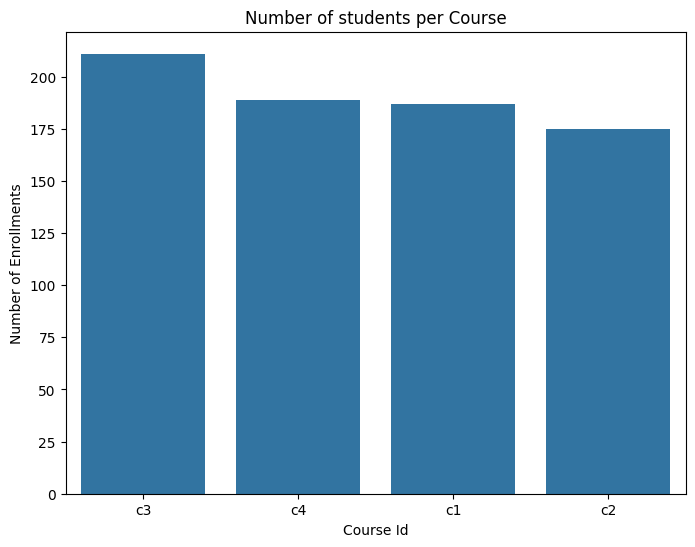

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

course_counts = interactions_df['course_id'].value_counts()
plt.figure(figsize = (8,6))
sns.barplot(x=course_counts.index,y=course_counts.values)
plt.title('Number of students per Course')
plt.xlabel('Course Id')
plt.ylabel('Number of Enrollments')
plt.show()

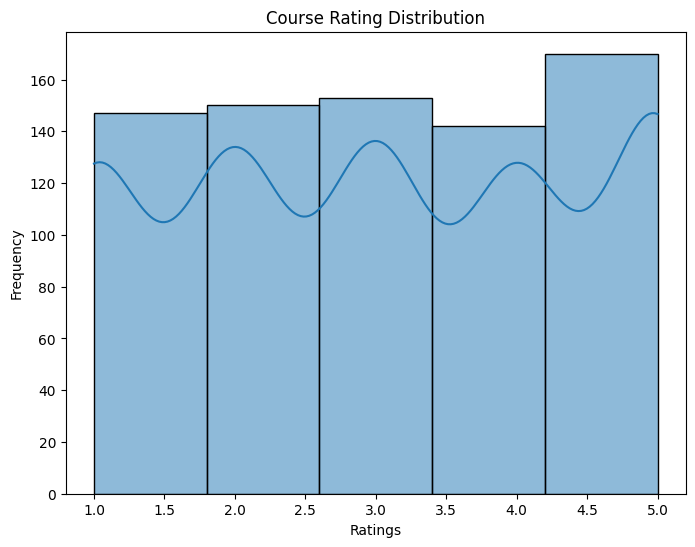

In [9]:
plt.figure(figsize = (8,6))
sns.histplot(interactions_df['rating'],bins = 5,kde = True)
plt.title('Course Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [10]:
print(metadata_df.duplicated().sum())
print(metadata_df.dtypes)

0
course_id      object
course_name    object
description    object
dtype: object


In [11]:
import numpy as np
user_item_matrix = interactions_df.pivot(index='student_id',columns='course_id',values='rating')
ratings_matrix = user_item_matrix.values 

print (ratings_matrix.shape)


(639, 4)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = {
    'course_id': ['c1', 'c2', 'c3', 'c4','c5'],
    'course_name': [
        'Business Communication',
        'Strategic Management',
        'Organizational Behaviour',
        'Corporate Governance and Ethics',
        'Professional Communication & Negotiation'

    ],
    'description1': [
        'this course covers the fundamentals of effective workplace communication including written verbal and non-verbal skills students will learn how to craft persuasive business messages deliver impactful presentations and negotiate successfully the course also explores professional email etiquette and strategies for conflict resolution in corporate settings',
        'this course explores business strategy formulation and implementation helping students develop analytical and decision-making skills topics include competitive analysis corporate planning leadership strategies and risk assessment students will learn how to create sustainable business models and adapt to market changes',
        'this course examines workplace dynamics focusing on motivation teamwork and leadership students will explore how organizational culture employee engagement and psychological factors influence productivity the course also covers leadership styles group behavior and methods for improving workplace performance',
        'this course delves into ethical decisionmaking in corporate settings students will learn about governance structures corporate social responsibility csr compliance regulations and ethical leadership the course covers case studies on business ethics and the impact of corporate governance on organizational success',
        'this course teaches students advanced communication skills for business settings topics include crafting professional emails persuasive presentations and active listening the course also covers negotiation tactics workplace etiquette and conflict resolution strategies to enhance professional interactions'
    ]
}
metadata1_df = pd.DataFrame(data)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(metadata1_df['description1'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=metadata1_df['course_id'])

print('Tf_IDF Matrix Shape:', tfidf_matrix.shape)
print('Tf-IDF Representation;')
print(tfidf_df.head())
                                            

                                  



Tf_IDF Matrix Shape: (5, 98)
Tf-IDF Representation;
             active     adapt  advanced  analysis  analytical  assessment  \
course_id                                                                   
c1         0.000000  0.000000  0.000000  0.000000    0.000000    0.000000   
c2         0.000000  0.197642  0.000000  0.197642    0.197642    0.197642   
c3         0.000000  0.000000  0.000000  0.000000    0.000000    0.000000   
c4         0.000000  0.000000  0.000000  0.000000    0.000000    0.000000   
c5         0.216295  0.000000  0.216295  0.000000    0.000000    0.000000   

           behavior  business      case   changes  ...   success  \
course_id                                          ...             
c1         0.000000  0.111200  0.000000  0.000000  ...  0.000000   
c2         0.000000  0.222696  0.000000  0.197642  ...  0.000000   
c3         0.201245  0.000000  0.000000  0.000000  ...  0.000000   
c4         0.000000  0.104974  0.186329  0.000000  ...  0.186329   


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=metadata1_df['course_id'], columns=metadata1_df['course_id'])

print('Cosine Similarity Matrix:')
print(cosine_sim_df)


Cosine Similarity Matrix:
course_id        c1        c2        c3        c4        c5
course_id                                                  
c1         1.000000  0.155573  0.093334  0.147575  0.374471
c2         0.155573  1.000000  0.071803  0.139410  0.159961
c3         0.093334  0.071803  1.000000  0.112517  0.102279
c4         0.147575  0.139410  0.112517  1.000000  0.089414
c5         0.374471  0.159961  0.102279  0.089414  1.000000


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4474  1.5149  1.3439  1.4740  1.4161  1.4393  0.0576  
MAE (testset)     1.2624  1.3169  1.1217  1.2899  1.2099  1.2402  0.0690  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


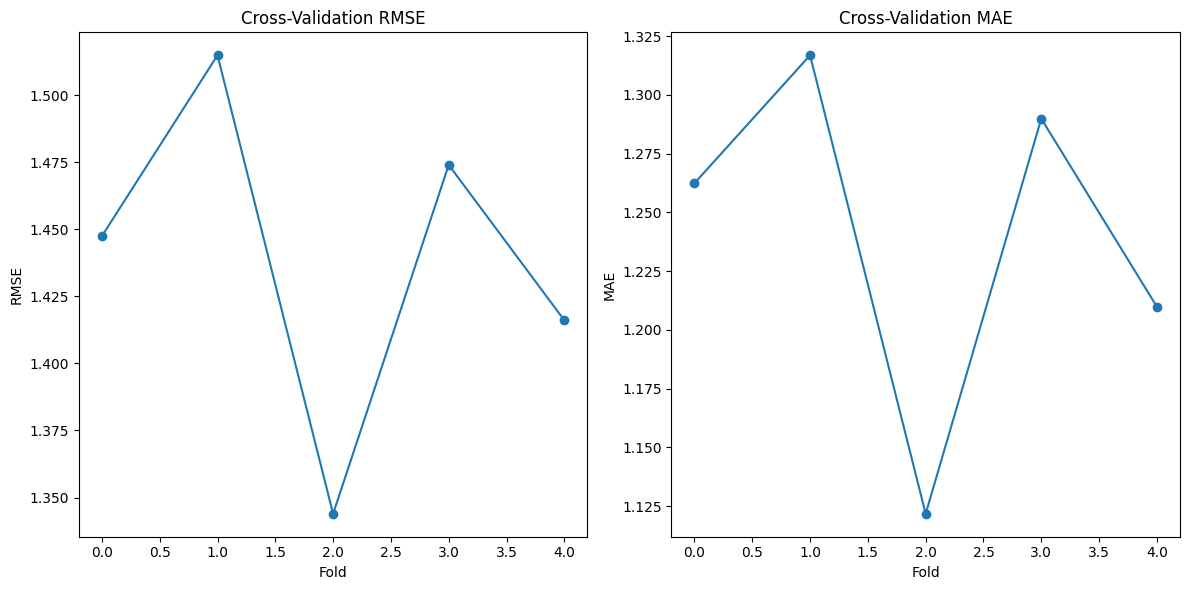

RMSE: 1.5057
MAE:  1.3022


[(291, 'c4', 3.0),
 (426, 'c3', 3.0),
 (629, 'c1', 1.0),
 (591, 'c3', 4.0),
 (576, 'c3', 4.0)]

In [14]:
import pandas as pd
import numpy as np
import re
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import accuracy
import matplotlib.pyplot as plt

unique_students = interactions_df['student_id'].unique()
student_id_mapping = {id_: i for i, id_ in enumerate(unique_students)}
interactions_df['student_id'] = interactions_df['student_id'].map(student_id_mapping)

user_item_matrix = interactions_df.pivot(index='student_id', columns='course_id', values='rating')

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(interactions_df[['student_id', 'course_id', 'rating']], reader)

crossval_results = cross_validate(SVD(n_factors=60, n_epochs=25, lr_all=0.007, reg_all=0.1), 
                                  data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

crossval_results

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(crossval_results['test_rmse'], marker='o', label='RMSE')
plt.title('Cross-Validation RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(crossval_results['test_mae'], marker='o', label='MAE')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd_model = SVD(n_factors=60, n_epochs=25, lr_all=0.007, reg_all=0.01)
svd_model.fit(trainset)

predictions = svd_model.test(testset)

rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

f'RMSE on test set: {rmse}'
f'MAE on test set: {mae}'

testset[:5]

 

In [20]:
course_popularity = interactions_df['course_id'].value_counts().index.tolist()

data = {
    'course_id': ['c1', 'c2', 'c3', 'c4','c5'],
    'course_name': [
        'Business Communication',
        'Strategic Management',
        'Organizational Behaviour',
        'Corporate Governance and Ethics',
        'Professional Communication & Negotiation'
    ],
    'description1': [
        'this course covers the fundamentals of effective workplace communication including written verbal and non-verbal skills students will learn how to craft persuasive business messages deliver impactful presentations and negotiate successfully the course also explores professional email etiquette and strategies for conflict resolution in corporate settings',
        'this course explores business strategy formulation and implementation helping students develop analytical and decision-making skills topics include competitive analysis corporate planning leadership strategies and risk assessment students will learn how to create sustainable business models and adapt to market changes',
        'this course examines workplace dynamics focusing on motivation teamwork and leadership students will explore how organizational culture employee engagement and psychological factors influence productivity the course also covers leadership styles group behavior and methods for improving workplace performance',
        'this course delves into ethical decisionmaking in corporate settings students will learn about governance structures corporate social responsibility csr compliance regulations and ethical leadership the course covers case studies on business ethics and the impact of corporate governance on organizational success',
        'this course teaches students advanced communication skills for business settings topics include crafting professional emails persuasive presentations and active listening the course also covers negotiation tactics workplace etiquette and conflict resolution strategies to enhance professional interactions'
    ]
}

metadata1_df = pd.DataFrame(data)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(metadata1_df['description1'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=metadata1_df['course_id'], columns=metadata1_df['course_id'])

def recommend_top_course(course_id, cosine_sim=cosine_sim_df, threshold=0.1):
    if course_id not in cosine_sim.index:
        return None
    sim_scores = cosine_sim[course_id].sort_values(ascending=False)
    sim_scores = sim_scores.drop(course_id)
    filtered_scores = sim_scores[sim_scores > threshold]
    return filtered_scores.idxmax() if not filtered_scores.empty else None

def hybrid_recommend(student_id, model, user_matrix, n=3, weight_cf=0.4, weight_cb=0.6):
    student_history = interactions_df[interactions_df['student_id'] == student_id]
    recommendations = []
    
    
    if not student_history.empty:
        taken_courses = set(student_history['course_id'])
        other_courses = set(user_item_matrix.columns)
        unseen_courses = other_courses - taken_courses
        cf_recommendations = []
        
        for course_id in unseen_courses:
            est_rating = model.predict(student_id, course_id).est
            cf_recommendations.append((course_id, est_rating))
        
        if cf_recommendations:
            cf_recommendations.sort(key=lambda x: x[1], reverse=True)
            cf_recommendations = [course_id for course_id, _ in cf_recommendations[:n]]
            recommendations.extend([(course, weight_cf) for course in cf_recommendations])

    
    if not student_history.empty:
        last_course = student_history.iloc[-1]['course_id']
        content_recommendation = recommend_top_course(last_course)
        if content_recommendation and content_recommendation not in taken_courses:
           recommendations.append((content_recommendation, weight_cb))

    
    if not recommendations:
        return course_popularity[:n]

    
    recommendations.sort(key=lambda x: x[1], reverse=True)
    final_recommendations = []
    added = set()
    for course, _ in recommendations:
        if course not in added:
            final_recommendations.append(course)
            added.add(course)
        if len(final_recommendations) == n:
            break

    return final_recommendations
student_id = 's1'  

mapped_student_id = student_id_mapping.get(student_id)

if mapped_student_id is None:
    recommended_courses = course_popularity[:3]  
else:
    recommended_courses = hybrid_recommend(mapped_student_id, svd_model, user_item_matrix)

print(f"Recommended courses: {recommended_courses}")


Recommended courses: ['c5', 'c2', 'c4']


In [21]:
import joblib

joblib.dump(svd_model, "recommendation_model.pkl")

print("recommendation_model.pkl")


recommendation_model.pkl


In [22]:
import shutil
shutil.move("recommendation_model.pkl", "C:/Users/mwende/Documents/flask_api/recommendation_model.pkl")


'C:/Users/mwende/Documents/flask_api/recommendation_model.pkl'

In [23]:
model2 = joblib.load("C:/Users/mwende/Documents/flask_api/recommendation_model.pkl")